<a href="https://colab.research.google.com/github/SummerProjectTEAM-10/sample/blob/SREVARDHANI/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/pro')

Mounted at /content/pro


In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the dataset
df = pd.read_csv("/content/pro/MyDrive/pima-indians-diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Descriptive statistics of the data set accessed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Count of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are a total of 768 records and 9 features in the 
dataset.
Each feature can be either of integer or float datatype.
Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

In [ ]:
#The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Correlation describes the strength and direction of the linear association between two quantitative variables.
It ranges from -1 to +1, Positive value indicate positive association and negative value indicate negative association.

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the correlation matrix we found that

Glucose,
BMI,
Age,
Pregnancies
are the top 4 features that are related to the outcome.

ALGORITHM:
1. Import the necessary package and load the dataset.
2. Plot different graphs- Data Visualization with suitable codes.
3. Pre process the dataset- filling the missing values with median values.
(Feature Engineering)
4. Outlier observation analysis by IQR and Z SCORE method.
5. Add logical new categorical variables to the dataset.
6. Convert categorical variable to numeric variable by Label Encoding and One Hot Encoding.


**Data Visualization: DATA STRUCTURE USED: Pandas DataFrame.**
With the help of data visualization, we can see how the data looks like and what kind of correlation is held by the attributes of data. It is the fastest way to see if the features correspond to the output. Visualization of data is an imperative aspect that helps to understand data and also explain the data to others.

**countplot**
Seaborn library has a function countplot() for creating countplot using sns.countplot() function. One easy way to visualize the counts of observations for outcome type is to create a count plot.

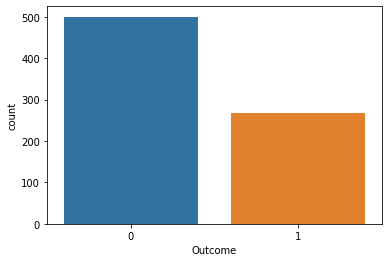

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

OBSERVATION:
We can observe that the count of 0 outcome that is count of diabetes negative is more than diabetes positive which is denoted as 1.


UNIVARIATE PLOTS: Understanding Attributes Independently.
The simplest type of visualization is single-variable or “univariate” visualization. With the help of univariate visualization, we can understand each attribute of our dataset independently.


**Histogram**:
Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. Characteristics–
•	It provides us a count of the number of observations in each bin created for visualization.
•	From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
•	Histograms also help us to see possible outliers.
hist() function on Pandas DataFrame are used to generate histograms and matplotlib are used for plotting them.


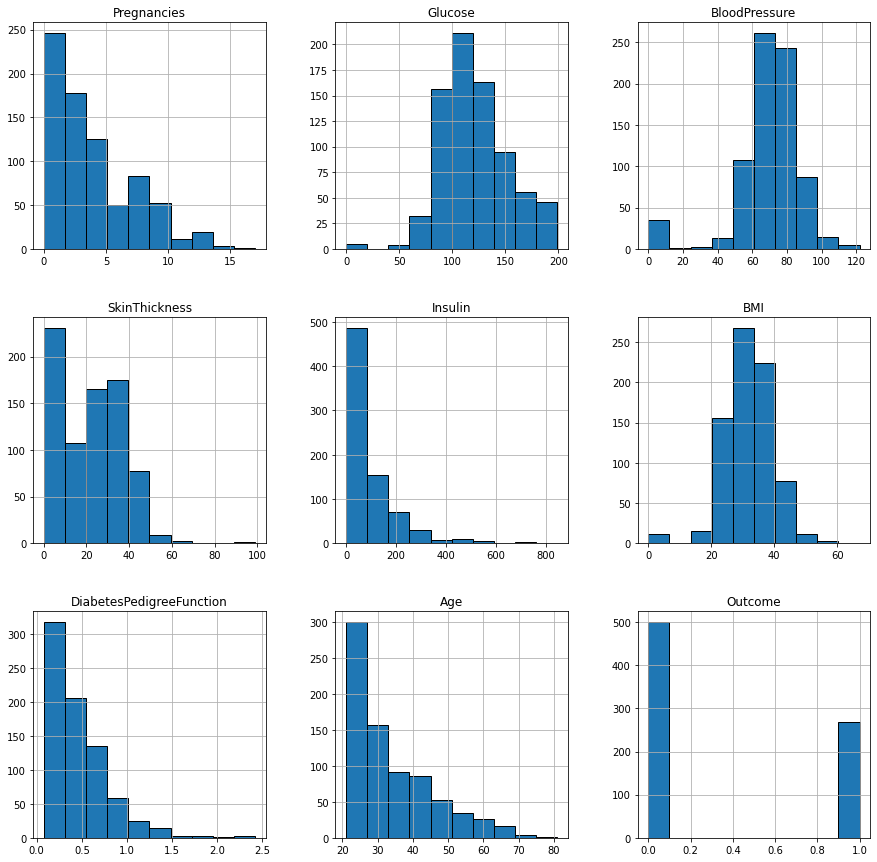

In [ ]:
df.hist(bins=10, edgecolor = "black", figsize=(15,15))
plt.show()

OBSERVATION: The output shows that the histogram for each attribute in the dataset is created. From this, we can observe that perhaps Age, Insulin and DiabetesPedigreeFunction attributes may have exponential distribution while BMI and Glucose have Gaussian distribution.

**Density Plots:**
Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin. We can call them as abstracted histograms and matplotlib are used for plotting them.

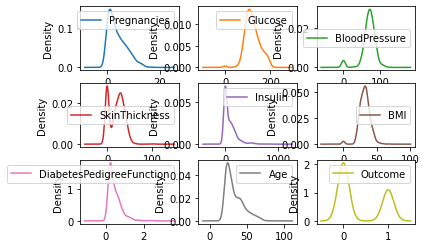

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

OBSERVATION: The difference between Density plots and Histograms can be easily understood.

**BoxPlot:**
Box and Whisker plots, also called boxplots in short, is another useful technique to review the distribution of each attribute’s distribution Seaborn library is used.

The following are the characteristics of this technique – 
•	It is univariate in nature and summarizes the distribution of each attribute.
•	It draws a line for the middle value i.e. for median.
•	It draws a box around the 25% and 75%.
•	It also draws whiskers which will give us an idea about the spread of the data.
•	The dots outside the whiskers signifies the outlier values. Outlier values would be 1.5 times greater than the size of the spread of the middle data.


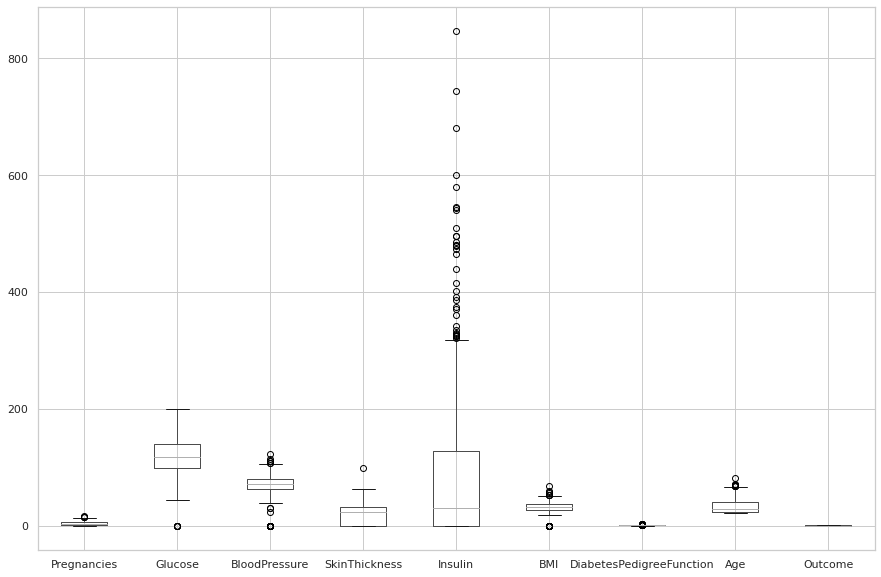

In [ ]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,10))

OBSERVATION: We can observe the outlier values.

MULTIVARIATE PLOTS: Interaction Among Multiple Variables
Another type of visualization is multi-variable or “multivariate” visualization. With the help of multivariate visualization, we can understand interaction between multiple attributes of our dataset.


**Correlation Matrix Plot**

Correlation is an indication about the changes between two variables. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
Correlation describes the strength and direction of the linear association between two quantitative variables. It ranges from -1 to +1, Positive value indicate positive association and negative value indicate negative association.


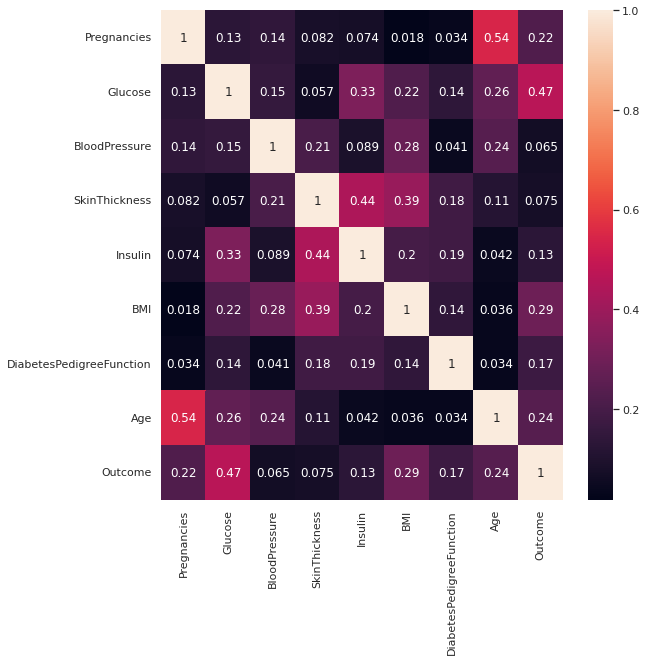

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(df.corr()), annot=True);

OBSERVATION: Glucose, BMI, Age, Pregnancies are the top 4 features that are related to the outcome. We can also see that it is symmetrical i.e. the bottom left is same as the top right. It is also observed that each variable is positively correlated with each other.

SCATTER MATRIX PLOT: Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions. Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features(Columns). Matplotlib library is used.

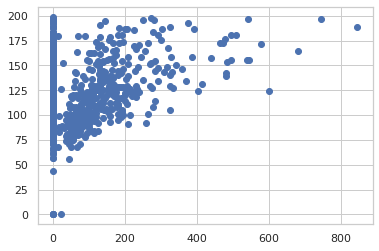

In [ ]:
plt.scatter( df['Insulin'], df['Glucose'])
plt.show()


OBSERVATION:
We can observe that there is a positive linear relation between the points. That is, as X increases, Y increases as well. If the value of y increases with the value of x, then we can say that the variables Glucose and Insulin have a positive correlation.


**PairPlot:**
Pairplot visualizes given data to find the relationship between them. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics. The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.The matplotlib library is used for plotting them.

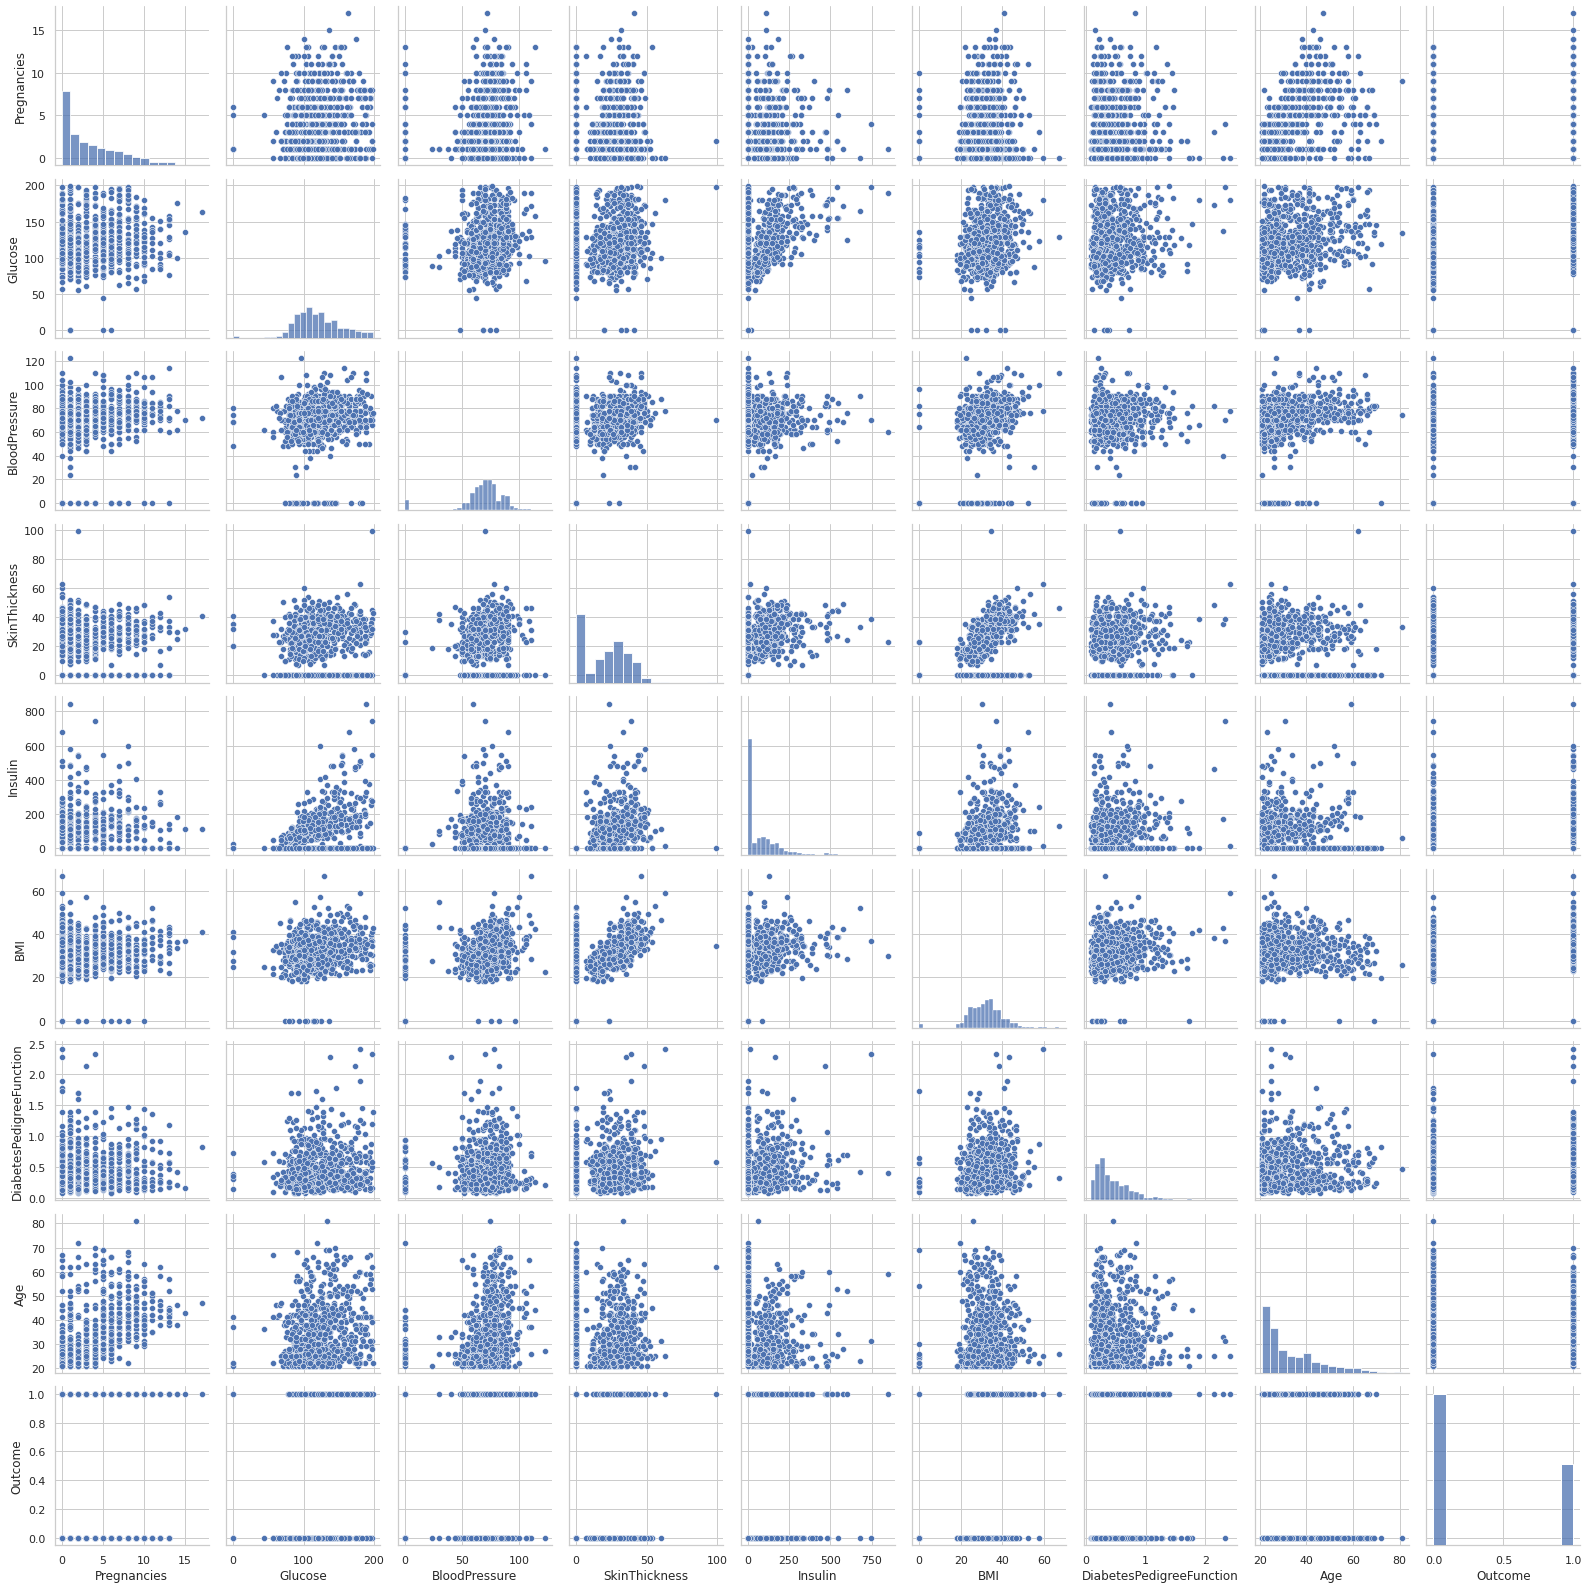

In [ ]:
# Pairplot 
sns.pairplot(data = df)
plt.show()

OBSERVATION: We can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

Hue helps us to get the difference in variable in data to map plot aspects to different colours.

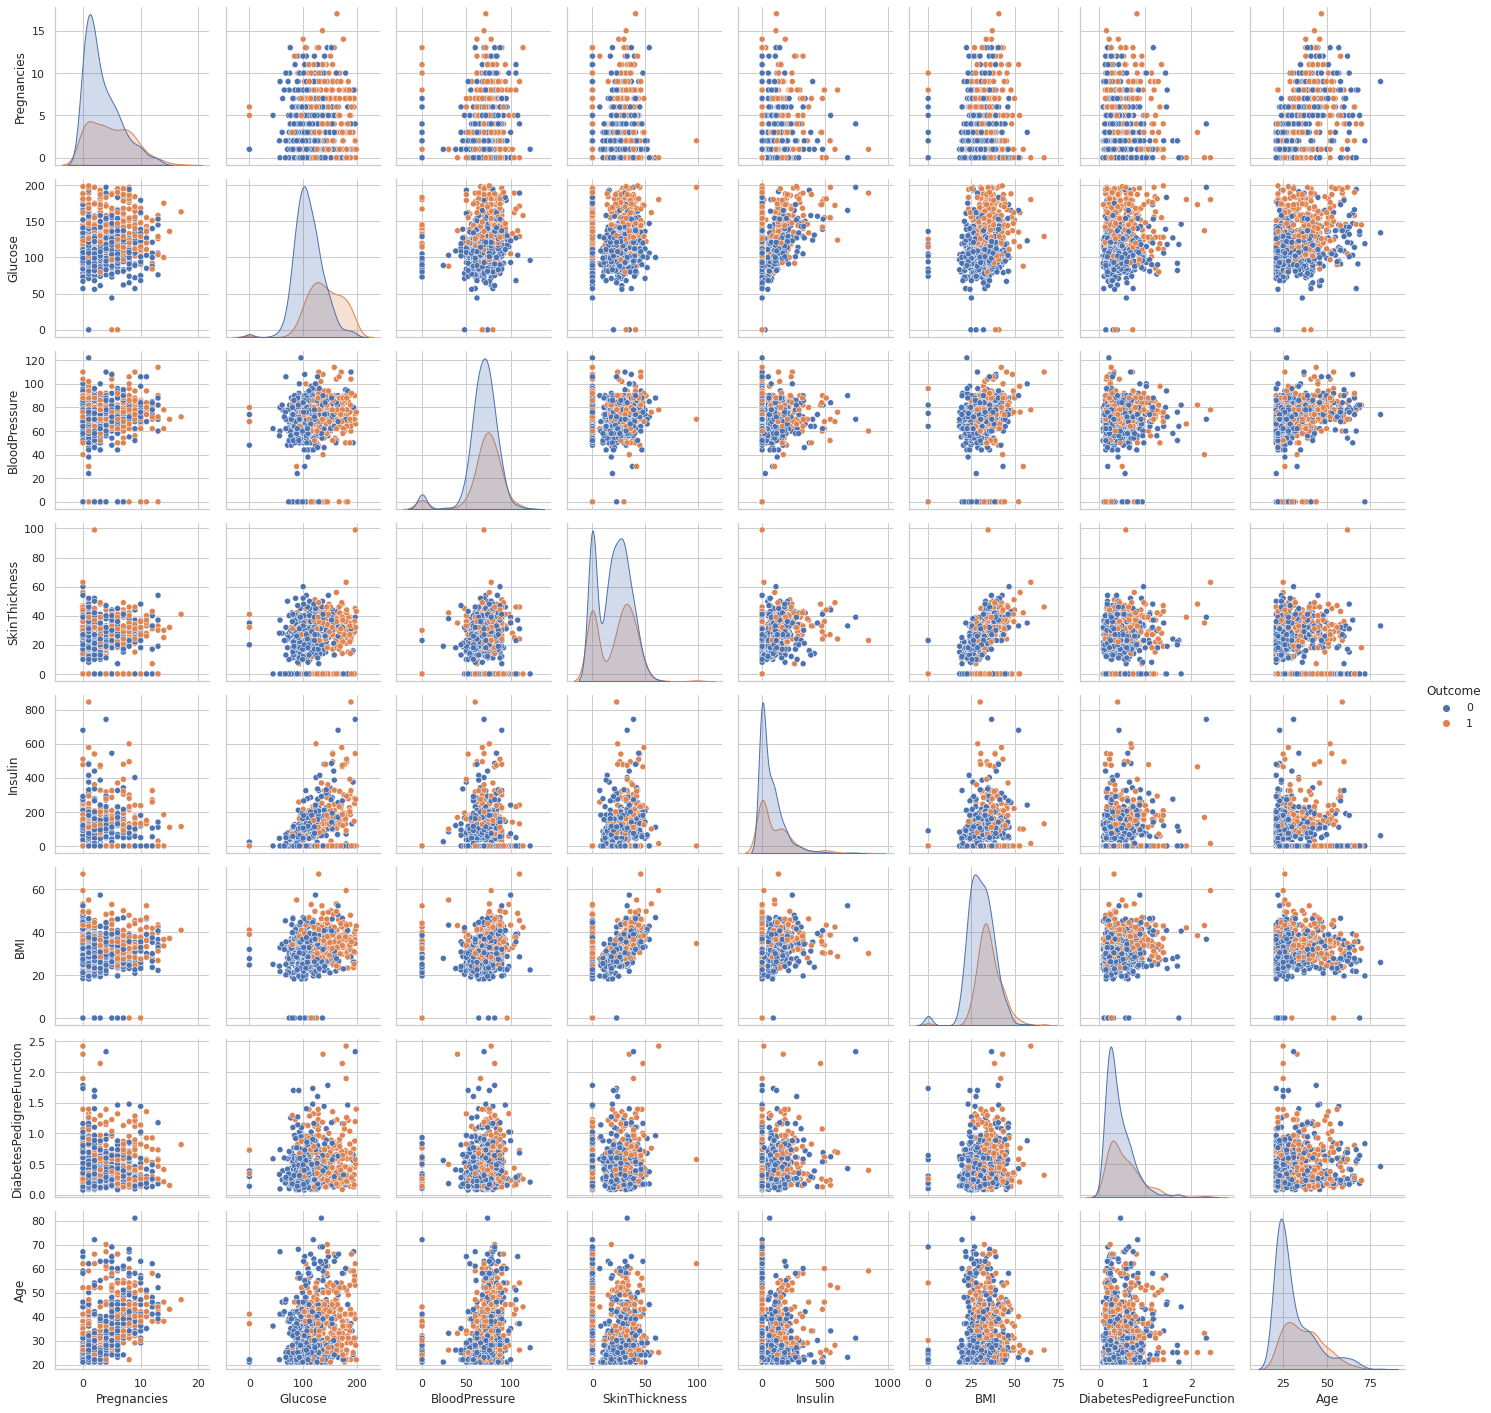

In [ ]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

OBSERVATION: From the above pairplots, we could observe that there is a positive correlation between various features:


* Glucose level increases with Age.
* Insulin level increases with Glucose level.
* Insulin level increases with Age.
* Slight increase in BloodPressure with Age.
* Slight increase in BloodPressure with Insulin.
* Skin thickness increases with insulin.
* Skin thickness increases with BMI.











**Missing Observation Analysis:**
We saw that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN, so that we can look at where are missing values. In order to proceed with my module- feature engineering, missing values are filled median values  of each variable that is the median value of people who are not sick and the median values of people who are sick.

In [ ]:

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [ ]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**FEATURE ENGINEERING:**
Process of extracting useful features from a raw dataset using mathematics, statistics and domain knowledge. Algorithms require features with some specific characteristic to work properly. Feature engineering mainly have two goals:
•	Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
•	Improving the performance of machine learning models.
It allows avoiding overfitting the model despite providing many input features. The ultimate goal is to get the best results from the algorithms.
DATA STRUCTURE USED: Numpy Pandas

OUTLIER OBSERVATION ANALYSIS: Outliers are datapoints that are far from other data points or unusual values in the dataset. These show some abnormality and deviate significantly from the normal data.

Tool used for finding the outliers: BOXPLOTS- Tool for exploratory data analysis and easily make comparisons between distributions.


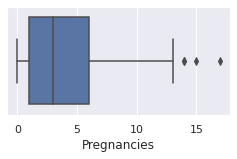

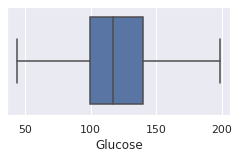

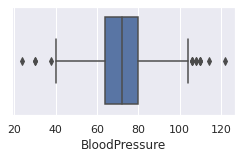

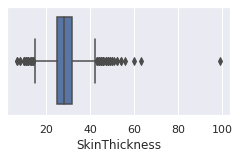

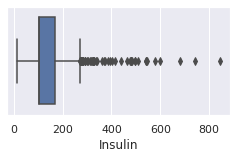

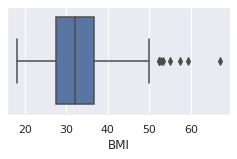

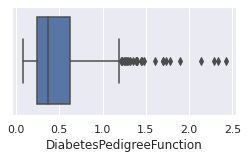

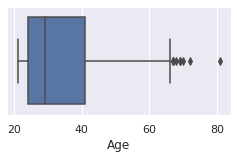

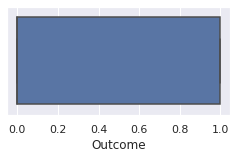

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Pregnancies'])
plt.show()
sns.boxplot(x=df['Glucose'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Outcome'])
plt.show()

Outliers are plotted as individual points.
We could observe that there is no outliers for Glucose and Outcome features and there are outliers for all other features.

IQR METHOD: Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
The interquartile range (IQR), also called the middle 50%, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1; these quartiles can be clearly seen on a box plot on the data.Libraries used- Seaborn and numpy


In [ ]:
#outlier remove
#IQR Method

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                   1.00000
Glucose                      99.75000
BloodPressure                64.00000
SkinThickness                25.00000
Insulin                     102.50000
BMI                          27.50000
DiabetesPedigreeFunction      0.24375
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     169.50000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                     67.0000
BMI                          9.1000
DiabetesPed

Printing the values of Q1, Q3 and IQR

In [ ]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (590, 9))

OBSERVATION: This removed the outliers from the dataset. After the removal of the outliers, the dataset has decreased by 178 records. All the outliers that is datapoints lesser than lower limit (Q1 - 1.5*IQR) and datapoints that are larger than the upper limit (Q3 + 1.5*IQR) are removed.

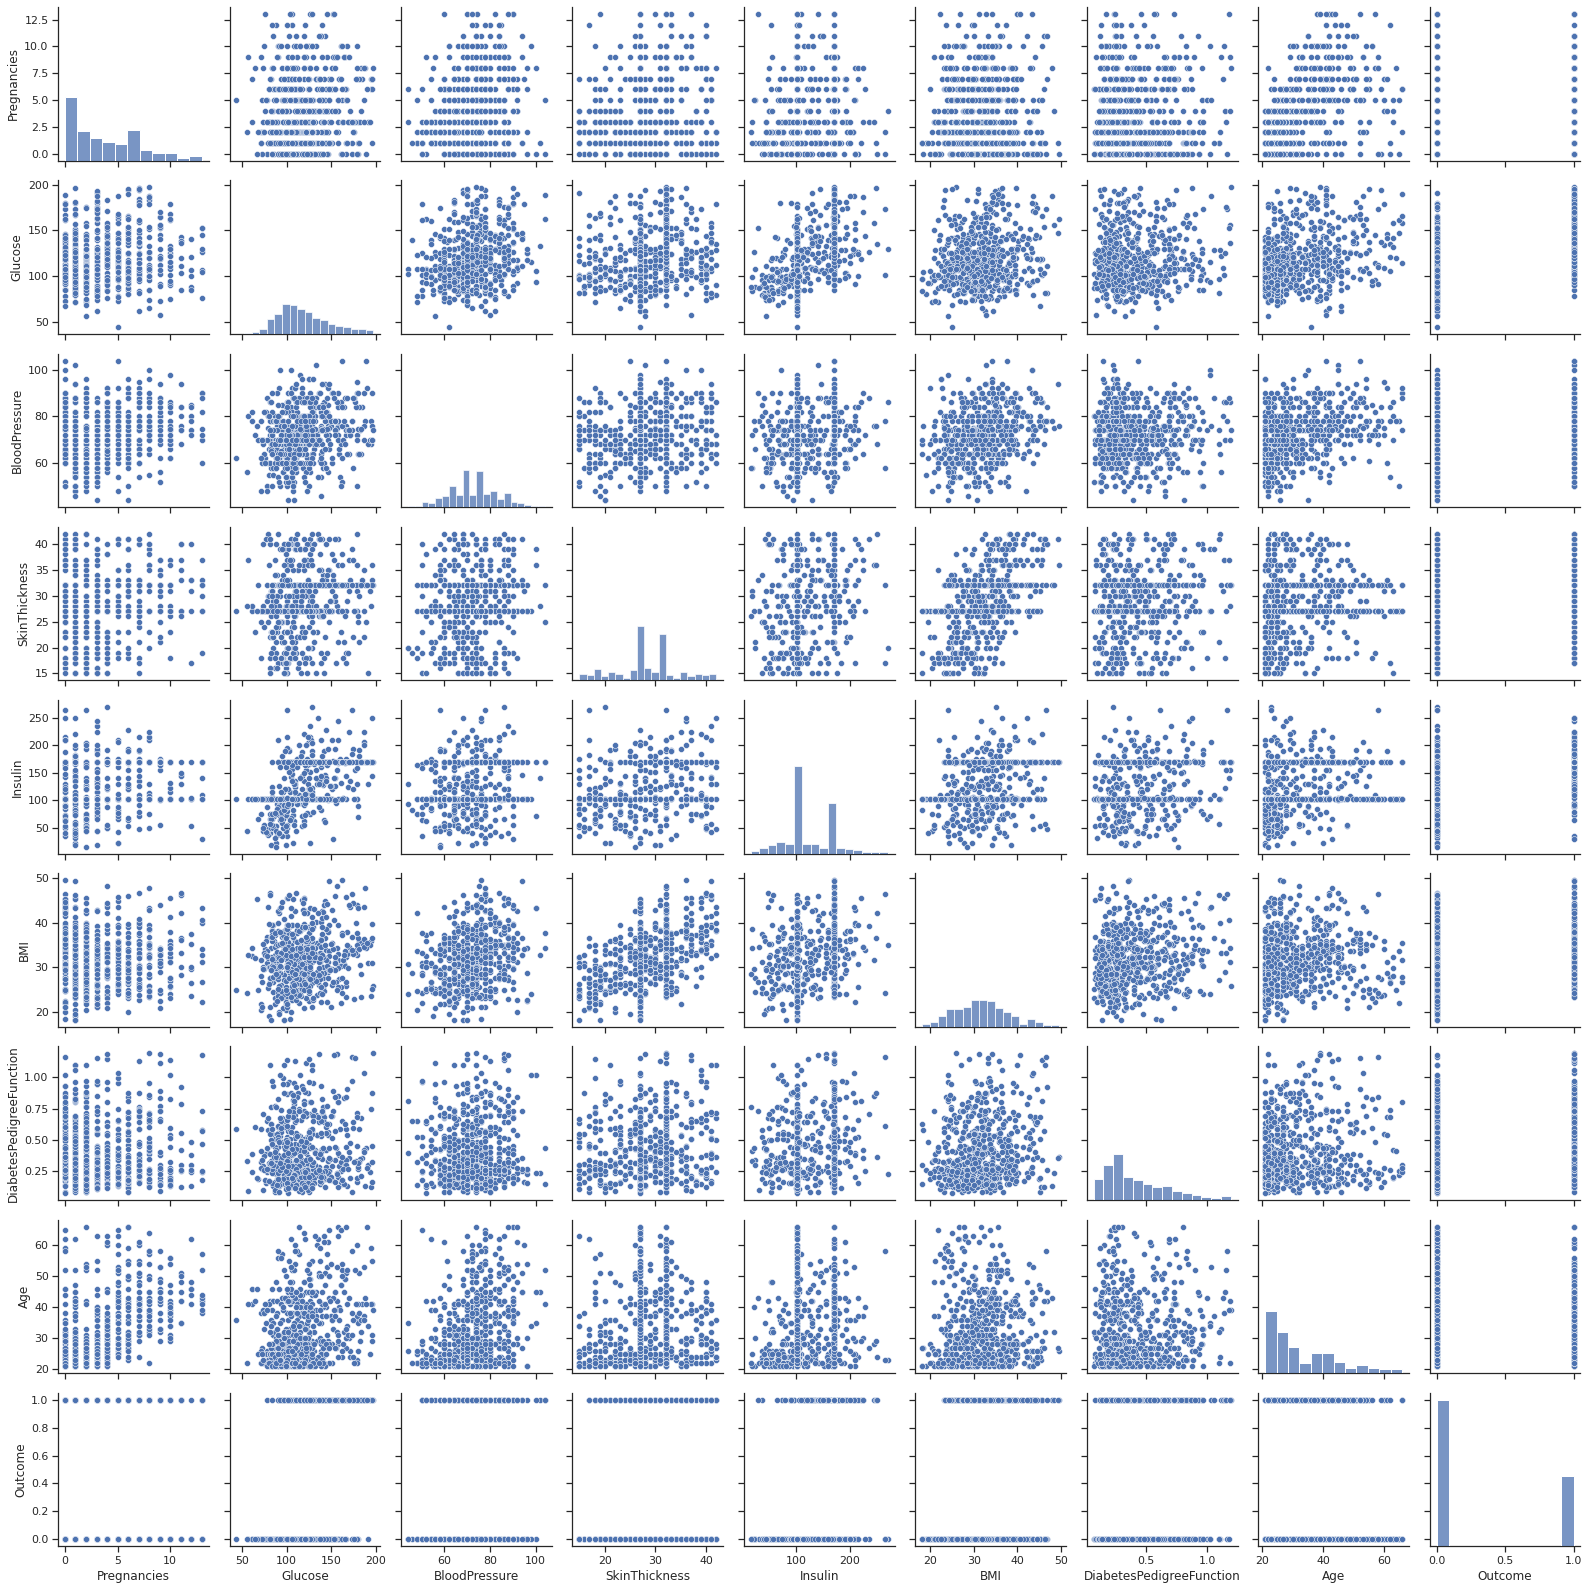

In [ ]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out)
plt.show()

OBSERVATION: Scatter matrix after removing outlier

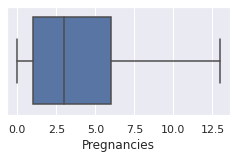

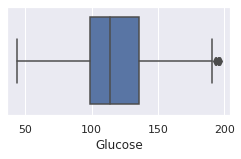

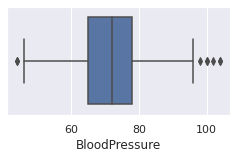

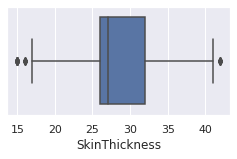

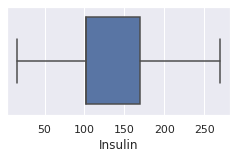

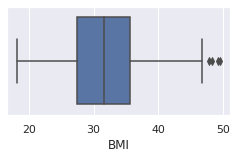

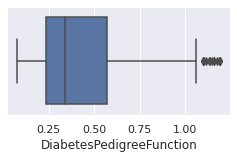

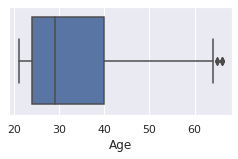

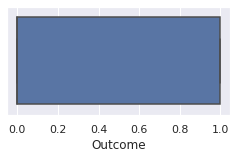

In [ ]:
#boxplot after removing outliers
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df_out['Pregnancies'])
plt.show()
sns.boxplot(x=df_out['Glucose'])
plt.show()
sns.boxplot(x=df_out['BloodPressure'])
plt.show()
sns.boxplot(x=df_out['SkinThickness'])
plt.show()
sns.boxplot(x=df_out['Insulin'])
plt.show()
sns.boxplot(x=df_out['BMI'])
plt.show()
sns.boxplot(x=df_out['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df_out['Age'])
plt.show()
sns.boxplot(x=df_out['Outcome'])
plt.show()

We could observe that the outliers of each feature are removed to a large extent.

Z SCORE METHOD:
Z score, also called standard score is another method that can be used to remove outliers.. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
Z score = (x -mean) / std. deviation.
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. Z-score function defined in scipy library to detect the outliers.
Libraries used- numpy


In [ ]:
z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.86462486 0.03218035 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20472661 0.52812374 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01426457 0.69343821 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02224005 0.03218035 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14199419 1.02406713 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94195182 0.19749482 ... 0.47378505 0.87137393 0.73212021]]


Looking the code and the output above, it is difficult to say which data point is an outlier. so, we need to define a threshold to identify an outlier.

In [ ]:
threshold = 3
print(np.where(z > 3 ))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))


The first array contains the list of row numbers and second array respective column numbers, which mean z[4][6] have a Z-score higher than 3.

In [ ]:
print(z[4][6])

5.484909100466951


 So, the data point 4th record on column 6 is an outlier as its values is greater than 3.

In [ ]:
df_remove = df [(z < 3).all(axis = 1)]
df_remove

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


OBSERVATION:

All the outliers are removed, for example, 4th record is deleted as it had outlier and thus we got the clean data.


In [ ]:
df_remove.shape, df.shape

((719, 9), (768, 9))

OBSERVATION: After the removal of the outliers, the dataset has decreased by 49 records.

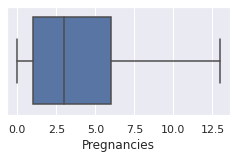

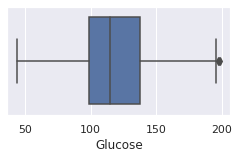

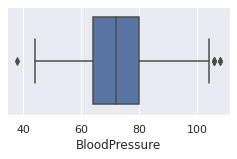

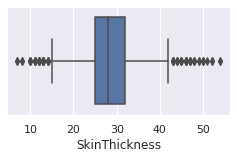

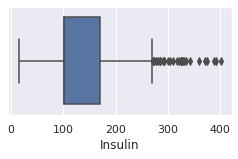

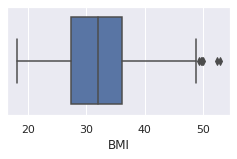

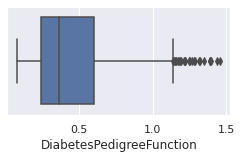

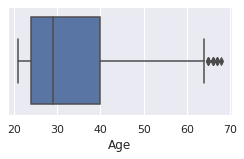

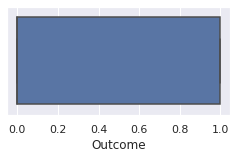

In [ ]:
#BOXPLOT after removing the outliers using Z score method
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df_remove['Pregnancies'])
plt.show()
sns.boxplot(x=df_remove['Glucose'])
plt.show()
sns.boxplot(x=df_remove['BloodPressure'])
plt.show()
sns.boxplot(x=df_remove['SkinThickness'])
plt.show()
sns.boxplot(x=df_remove['Insulin'])
plt.show()
sns.boxplot(x=df_remove['BMI'])
plt.show()
sns.boxplot(x=df_remove['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df_remove['Age'])
plt.show()
sns.boxplot(x=df_remove['Outcome'])
plt.show()

OBSERVATION:

We can observe that outliers are removed to some extent only when compared to IQR method.


I have implemented two methods – IQR method and Z SCORE method to detect and remove the outliers from the dataset. The former method decreases the dataset to 590 records, whereas the later method decreases to719 records. Thus, Z score method deletes only 49 records from the dataset. On the other hand, Box Plots shows better results for IQR method than the Z score method. So, the method for the analysis of outliers will be selected according to accuracy level.

Feature Engineering:
Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables are created according to BMI, Insulin and glucose variables. Max and Min values of each variable are found and some ranges are determined and categorical variables are assigned to BMI, Insulin and glucose variables. These categorical variables helps in easy understanding of the dataset.

In [ ]:
print("Max : Pregnancies " + str(df["Pregnancies"].max()) + " Min Pregnancies: " + str(df["Pregnancies"].min()))

Max : Pregnancies 17 Min Pregnancies: 0


In [ ]:
print("Max Glucose: " + str(df["Glucose"].max()) + " Min Glucose: " + str(df["Glucose"].min()))

Max Glucose: 199.0 Min Glucose: 44.0


In [ ]:
print("Max BloodPressure: " + str(df["BloodPressure"].max()) + " Min BloodPressure: " + str(df["BloodPressure"].min()))

Max BloodPressure: 122.0 Min BloodPressure: 24.0


In [ ]:
print("Max SkinThickness: " + str(df["SkinThickness"].max()) + " Min SkinThickness: " + str(df["SkinThickness"].min()))

Max SkinThickness: 99.0 Min SkinThickness: 7.0


In [ ]:
print("Max Insulin: " + str(df["Insulin"].max()) + " Min Insulin: " + str(df["Insulin"].min()))

Max Insulin: 846.0 Min Insulin: 14.0


In [ ]:
print("Max BMI: " + str(df["BMI"].max()) + " Min BMI: " + str(df["BMI"].min()))

Max BMI: 67.1 Min BMI: 18.2


In [ ]:
print("Max DiabetesPedigreeFunction: " + str(df["DiabetesPedigreeFunction"].max()) + " Min DiabetesPedigreeFunction: " + str(df["DiabetesPedigreeFunction"].min()))

Max DiabetesPedigreeFunction: 2.42 Min DiabetesPedigreeFunction: 0.078


In [ ]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


Library used: Pandas

In [ ]:
# According to BMI, some ranges are determined and categorical variables are assigned.
NewBMI = pd.Series(["Underweight", "Healthy", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


OBSERVATION: According to BMI, 6 different ranges -Underweight, Healthy, Overweight, Obesity 1, Obesity 2, Obesity 3 are determined and categorical variable NewBMI is assigned. This categorical variable is ordinal- Ordinal categorical attributes have some sense or notion of order amongst its values.

In [ ]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


OBSERVATION: A categorical variable creation process is performed according to the insulin value. NewInsulinScore has 2 range- Normal and Abnormal and it is an ordinal categorical variable.

In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Prediabetes", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High


OBSERVATION: Some intervals- Low, Normal, Prediabetes, High were determined according to the glucose variable and these were assigned  an ordinal categorical variable, NewGlucose.

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal,Normal
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal,Prediabetes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,Obesity 1,Abnormal,High
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal,Prediabetes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   NewBMI                    768 non-null    category
 10  NewInsulinScore           768 non-null    object  
 11  NewGlucose                768 non-null    category
dtypes: category(2), float64(6), int64(3), object(1)
memory usage: 62.0+ KB


We can now observe three categorical variables that are created. Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with 2 methos: Label Encoding and One Hot Encoding method.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

**Label Encoding:** Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Here, each category is assigned a value from 1 to n, where n is the number of labels for the categorical feature.

In [ ]:
df1 = df[["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age",	"Outcome",	"NewBMI",	"NewInsulinScore",	"NewGlucose"]]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High


In [ ]:
df1['BMI_Lable'] = Le.fit_transform(df1['NewBMI'])

In [ ]:
df1['BMI_Lable']

0      1
1      4
2      0
3      4
4      3
      ..
763    1
764    2
765    4
766    1
767    1
Name: BMI_Lable, Length: 768, dtype: int64

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High,3


OBSERVATION:
The categorical variable NewBMI is encoded by label encoding method. The new numeric BMI_Label feature has been encoded with:
0 for Healthy,
1 for Obesity_1,
2 for Obesity_2,
3 for Obesity_3,
4 for Overweight and
5 for Underweight.


In [ ]:
df1['Insulin_Lable'] = Le.fit_transform(df1['NewInsulinScore'])

In [ ]:
df1['Insulin_Lable']

0      0
1      1
2      0
3      1
4      0
      ..
763    0
764    1
765    1
766    0
767    1
Name: Insulin_Lable, Length: 768, dtype: int64

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High,3,0


OBSERVATION:

We can observe that the categorical variable NewInsulinScore is encoded by label encoding method. The new numeric Insulin_Label feature has been encoded with:
0 for Abnormal, and
1 for Normal.


In [ ]:
df1['Glucose_Lable'] = Le.fit_transform(df1['NewGlucose'])

In [ ]:
df1['Glucose_Lable']

0      0
1      2
2      0
3      2
4      0
      ..
763    3
764    3
765    3
766    3
767    2
Name: Glucose_Lable, Length: 768, dtype: int64

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1,2
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High,3,0,0


OBSERVATION: The categorical variable NewGlucose is encoded by label encoding method. The new numeric Glucose_Label feature has been encoded with: 0 for High, 1 for Low, 2 for Normal, and 3 for Prediabetes.

In [ ]:
df1.shape

(768, 15)

In [ ]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1,2
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High,3,0,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes,4,1,3
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal,Normal,1,1,2
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal,Prediabetes,2,1,3
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,Obesity 1,Abnormal,High,1,0,0
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal,Prediabetes,1,0,3


Now, we can drop the categorical variables.

In [ ]:
df1 = df1.drop(["NewBMI",	"NewInsulinScore",	"NewGlucose"],axis=1)

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4,1,2
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3,0,0


Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

**One Hot Encoding:** One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column. This method changes our categorical data, which is challenging to understand for algorithms, to a numerical format and enables us to group our categorical data without losing any information.

If we have N distinct values in the column, it is enough to map them to N-1 binary columns, because the missing value can be deducted from other columns. If all the columns in our hand are equal to 0, the missing value must be equal to 1. This is the reason why it is called as one-hot encoding.

In [ ]:
df2 = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0


OBSERVATION:
•	The categorical variable, NewBMI have 6(k) categories which are converted into 5(k-1) new columns: NewBMI_Obesity 1, NewBMI_Obesity 2, NewBMI_Obesity 3, NewBMI_Overweight and are assigned with 1or 0 (notation for true/false) values to the columns.
•	The categorical variable, NewInsulinScore have 2 categories which are converted into 1 new column: NewInsulinScore_Normaland are assigned with 1or 0 values to the column.
•	The categorical variable, NewGlucose have 4 categories which are converted into 3 new columns: NewGlucose_Low, NewGlucose_Normal, NewGlucose_Prediabetes and are assigned with 1or 0 values to the columns.


In [ ]:
df2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,0,0,0,1,0,1,0,0,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1,0,0,0,0,1,0,1,0
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,0,1,0,0,0,1,0,0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1,0,0,0,0,0,0,0,0
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,1,0,0,0,0,0,0,0,1


In [ ]:
categorical_df = df2[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Prediabetes']]
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0


In [ ]:
df2.shape

(768, 18)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Lable                 768 non-null    int64  
 10  Insulin_Lable             768 non-null    int64  
 11  Glucose_Lable             768 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 72.1 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   NewBMI_Obesity 1          768 non-null    uint8  
 10  NewBMI_Obesity 2          768 non-null    uint8  
 11  NewBMI_Obesity 3          768 non-null    uint8  
 12  NewBMI_Overweight         768 non-null    uint8  
 13  NewBMI_Underweight        768 non-null    uint8  
 14  NewInsulin

All categorical variables in the dataset are converted into numeric values by encoding.